In [1]:
import pandas as pd
import numpy as np
from scipy import stats 
import matplotlib.pyplot as plt

In [2]:
file = '../../../../Google Drive File Stream/My Drive/USC Expeditions Year 5/Analysis/Help-Seeking/Data/FS/p3_FS.csv'
data3 = pd.read_csv(file)

In [3]:
file = '../../../../Google Drive File Stream/My Drive/USC Expeditions Year 5/Analysis/Help-Seeking/Data/FS/p5_FS.csv'
data5 = pd.read_csv(file)

In [4]:
file = '../../../../Google Drive File Stream/My Drive/USC Expeditions Year 5/Analysis/Help-Seeking/Data/FS/p7_FS.csv'
data7 = pd.read_csv(file)

In [5]:
file = '../../../../Google Drive File Stream/My Drive/USC Expeditions Year 5/Analysis/Help-Seeking/Data/FS/p8_FS.csv'
data8 = pd.read_csv(file)

In [6]:
file = '../../../../Google Drive File Stream/My Drive/USC Expeditions Year 5/Analysis/Help-Seeking/Data/FS/p9_FS.csv'
data9 = pd.read_csv(file)

In [7]:
file = '../../../../Google Drive File Stream/My Drive/USC Expeditions Year 5/Analysis/Help-Seeking/Data/FS/p10_FS.csv'
data10 = pd.read_csv(file)

In [8]:
data = [data3, data5, data7, data8, data9, data10]
part = [3, 5, 7, 8, 9, 10]

In [14]:
for i in data9['session_num'].unique():
    print(i)

3.1
3.2
4.0
9.0
13.0
15.0


In [11]:
count = 0
for d in data:
    print(len(d['session_num'].unique()))
    count += len(d['session_num'].unique())
print(count-31)

9
8
8
9
6
31
40


In [11]:
# Continuous Poor Tracking 

all_bad = []  # length of a poor tracking segment

all_bad_en = [] # engagement of a poor tracking segment

all_bad_last_en = []    # last engagement value of a poor tracking segment 

for i in range(0, len(data)):
    d = data[i]
    
    win_length = 0        # current length of poor tracking segment
    win_start = 0         # start of current poor tracking segment
    
    last = -1             # last of_success value
    last_sess = -1        # last session value
    
    track_bad = []
    track_bad_en = []
    track_bad_last_en = []
    
    for i,r in d.iterrows():
        if (last != r['of_success']) or (last_sess != r['session_num']):
            # record if last of_success value was bad (if this was a poor tracking segment) 
            if (last == 0):
                track_bad.append(win_length)
                track_bad_en.append(np.average(d.loc[win_start:i-1, 'engagement']))
                
                # record engagement before this poor tracking segment
                check = win_start-1
                if (check < 0) or (d.loc[check, 'session_num'] != r['session_num']):
                    track_bad_last_en.append(0) # disengaged if this is beginning of video
                else:
                    track_bad_last_en.append(d.loc[check, 'engagement'])
            
            win_length = 0
            win_start = i
            last = r['of_success']
            last_sess = r['session_num']
        
        win_length += 1
    
    # grab last one 
    if (last == 0):
        track_bad.append(win_length)
        track_bad_en.append(np.average(d.loc[win_start:, 'engagement']))
        # record engagement before this poor tracking segment
        check = win_start-1
        if (check < 0) or (d.loc[check, 'session_num'] != d.loc[win_start, 'session_num']):
            track_bad_last_en.append(0) # disengaged if this is beginning of video
        else:
            track_bad_last_en.append(d.loc[check, 'engagement'])

    all_bad.append(track_bad)
    all_bad_en.append(track_bad_en)
    all_bad_last_en.append(track_bad_last_en)

    print('hi')

hi
hi
hi
hi
hi
hi


In [39]:
for i in range(10):
    print(master_bad[i], master_en[i], master_last_en[i])
    print(int(round(master_en[i], 0)))
    print()

5 1.0 1.0
1

1 1.0 1.0
1

4 1.0 1.0
1

7 1.0 1.0
1

1 1.0 1.0
1

7 1.0 1.0
1

10 1.0 1.0
1

74 1.0 1.0
1

2 1.0 1.0
1

5 1.0 1.0
1



In [31]:
master_bad = []
for i in all_bad:
    for j in i:
        master_bad.append(j)

In [32]:
master_en = []
for i in all_bad_en:
    for j in i:
        master_en.append(j)

In [33]:
master_last_en = []
for i in all_bad_last_en:
    for j in i:
        master_last_en.append(j)

In [46]:
count = 0
for i in range(0, len(master_bad)):
    if (master_en[i])%1 == 0 or (master_en[i])%1 == 1:
        if int(round(master_en[i], 0)) == int(round(master_last_en[i], 0)):
            count += 1
    
print(count/len(master_bad))

0.9757498195182779


In [23]:
import decimal

def drange(x, y, jump):
  while x < y:
    yield float(x)
    x += decimal.Decimal(jump)

In [24]:
master_bad = np.array(master_bad)/30.0

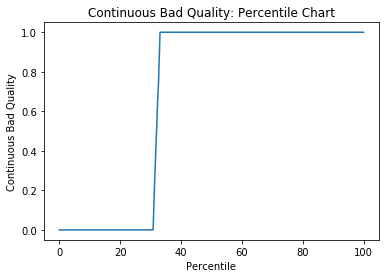

In [26]:
percentile = list(drange(0, 100, '0.01'))
percentile.append(100)

percentile_track = []

for i in percentile:
    percentile_track.append(np.percentile(master_en, i))

plt.plot(percentile, percentile_track)
plt.xlabel('Percentile')
plt.ylabel('Continuous Bad Quality')
plt.title('Continuous Bad Quality: Percentile Chart')
plt.show() 

In [ ]:
percentile = list(drange(0, 90, '0.01'))
percentile.append(90)

percentile_track = []

for i in percentile:
    percentile_track.append(np.percentile(master_bad, i))

plt.plot(percentile, percentile_track)
plt.xlabel('Percentile')
plt.ylabel('Continuous Bad Quality')
plt.title('Continuous Bad Quality: Percentile Chart')
plt.show() 

In [ ]:
percentile = list(drange(0, 80, '0.01'))
percentile.append(80)

percentile_track = []

for i in percentile:
    percentile_track.append(np.percentile(master_bad, i))

plt.plot(percentile, percentile_track)
plt.xlabel('Percentile')
plt.ylabel('Continuous Bad Quality')
plt.title('Continuous Bad Quality: Percentile Chart')
plt.show() 

In [ ]:
percentile = list(drange(0, 70, '0.01'))
percentile.append(70)

percentile_track = []

for i in percentile:
    percentile_track.append(np.percentile(master_bad, i))

plt.plot(percentile, percentile_track)
plt.xlabel('Percentile')
plt.ylabel('Continuous Bad Quality')
plt.title('Continuous Bad Quality: Percentile Chart')
plt.show() 

In [ ]:
percentile = list(drange(0, 60, '0.01'))
percentile.append(60)

percentile_track = []

for i in percentile:
    percentile_track.append(np.percentile(master_bad, i))

plt.plot(percentile, percentile_track)
plt.xlabel('Percentile')
plt.ylabel('Continuous Bad Quality')
plt.title('Continuous Bad Quality: Percentile Chart')
plt.show() 

In [ ]:
percentile = list(drange(0, 50, '0.01'))
percentile.append(50)

percentile_track = []

for i in percentile:
    percentile_track.append(np.percentile(master_bad, i))

plt.plot(percentile, percentile_track)
plt.xlabel('Percentile')
plt.ylabel('Continuous Bad Quality')
plt.title('Continuous Bad Quality: Percentile Chart')
plt.show() 

In [ ]:
plt.rcParams["figure.figsize"] = [6,4]


plt.scatter(master_bad, master_en)
plt.title('Continuous Bad Quality vs Engagement')
plt.xlabel('Continuous Bad Quality')
plt.ylabel('Engagement')
plt.show()

In [ ]:
master_bad, master_en = (list(t) for t in zip(*sorted(zip(master_bad, master_en))))

In [ ]:
#cutoff = int(0.90*len(master_bad)-1)
cutoff = 0
master_bad90 = master_bad[cutoff:]
master_bad_en90 = master_en[cutoff:]

count = 0
for i,v in enumerate(master_bad_en90):
    if v < 0.5:
        count += master_bad90[i]

print(count/sum(master_bad90))

In [ ]:
plt.rcParams["figure.figsize"] = [6,4]


plt.scatter(master_bad, master_en)
plt.title('Continuous Bad Quality vs Engagement')
plt.xlabel('Continuous Bad Quality')
plt.ylabel('Engagement')
plt.show()